# 참고자료

* [혼란한 Matplotlib에서 질서 찾기](https://jehyunlee.github.io/2022/10/16/Python-DS-117-pycon2022/)
* [set_hls](https://jehyunlee.github.io/2022/09/05/Python-DS-112-sethls/)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [2]:
sns.__version__

'0.12.1'

In [3]:
# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 1. seaborn 설정을 해 준 경우 비교

In [4]:
# 데이터
x = np.linspace(-2, 2)
x_squared = 0.5 * x ** 2
cosine_x = np.cos(2 * x)

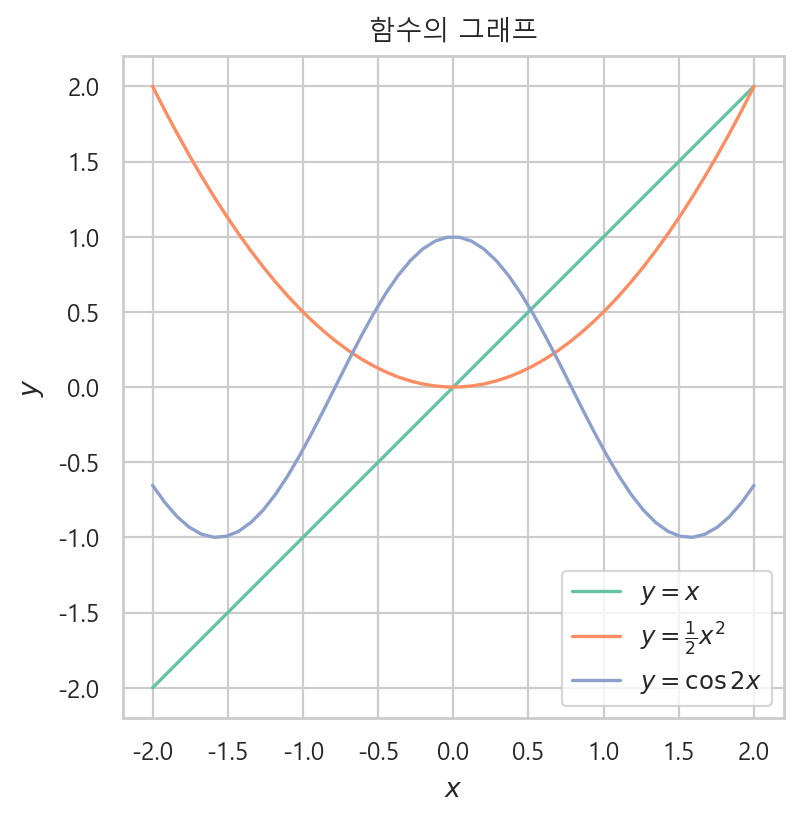

In [5]:
# 시각화
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, x, label=R"$y = x$")
ax.plot(x, x_squared, label=R"$y = \frac{1}{2} x^2$")
ax.plot(x, cosine_x, label=R"$y = \cos 2x$")
ax.set(xlabel=R"$x$", ylabel=R"$y$", title="함수의 그래프", aspect=1)   # aspect: 눈금의 비율(x:y = 1:2)
#ax.grid()
ax.legend();

In [6]:
iris = pd.read_csv("../data/Iris.csv",
                  encoding="utf-8",
                  index_col = 0)

In [7]:
feature_x = "SepalLengthCm"
feature_y = "SepalWidthCm"
feature_additional = "PetalWidthCm"

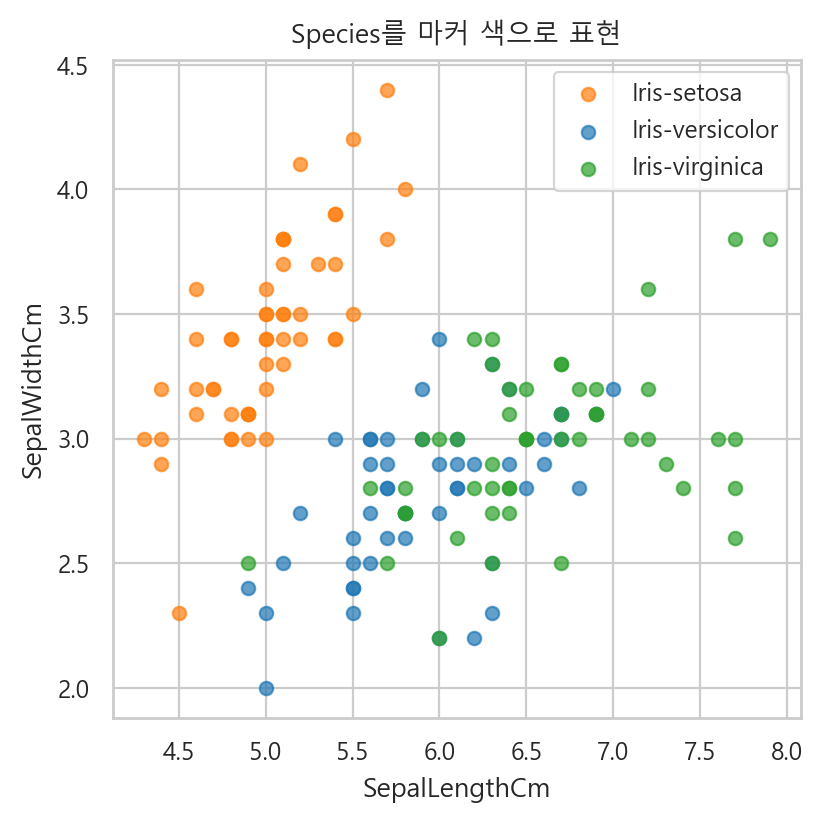

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

for s, c in zip(iris["Species"].unique(), ["tab:orange", "tab:blue", "tab:green"]):
    ax.scatter(iris[iris["Species"] == s][feature_x],
               iris[iris["Species"] == s][feature_y],
               color=c,
               alpha=0.7,
               label=s)

ax.set(xlabel=feature_x,
       ylabel=feature_y,
       title="Species를 마커 색으로 표현")

ax.legend();

# 2. 객체 지향 방식으로 그리자

* `matplolib`에는 `matlap`에서 물려받은 두 가지 그림 그리는 방식이 있음
    * 상태 기반 방식: state-based framework
        * 순서대로 그리는 방식
        * `plt.`
    * 객체 지향 방식: object-oriented framework
        * 대상을 지정해 그리는 방식
        * `ax.`

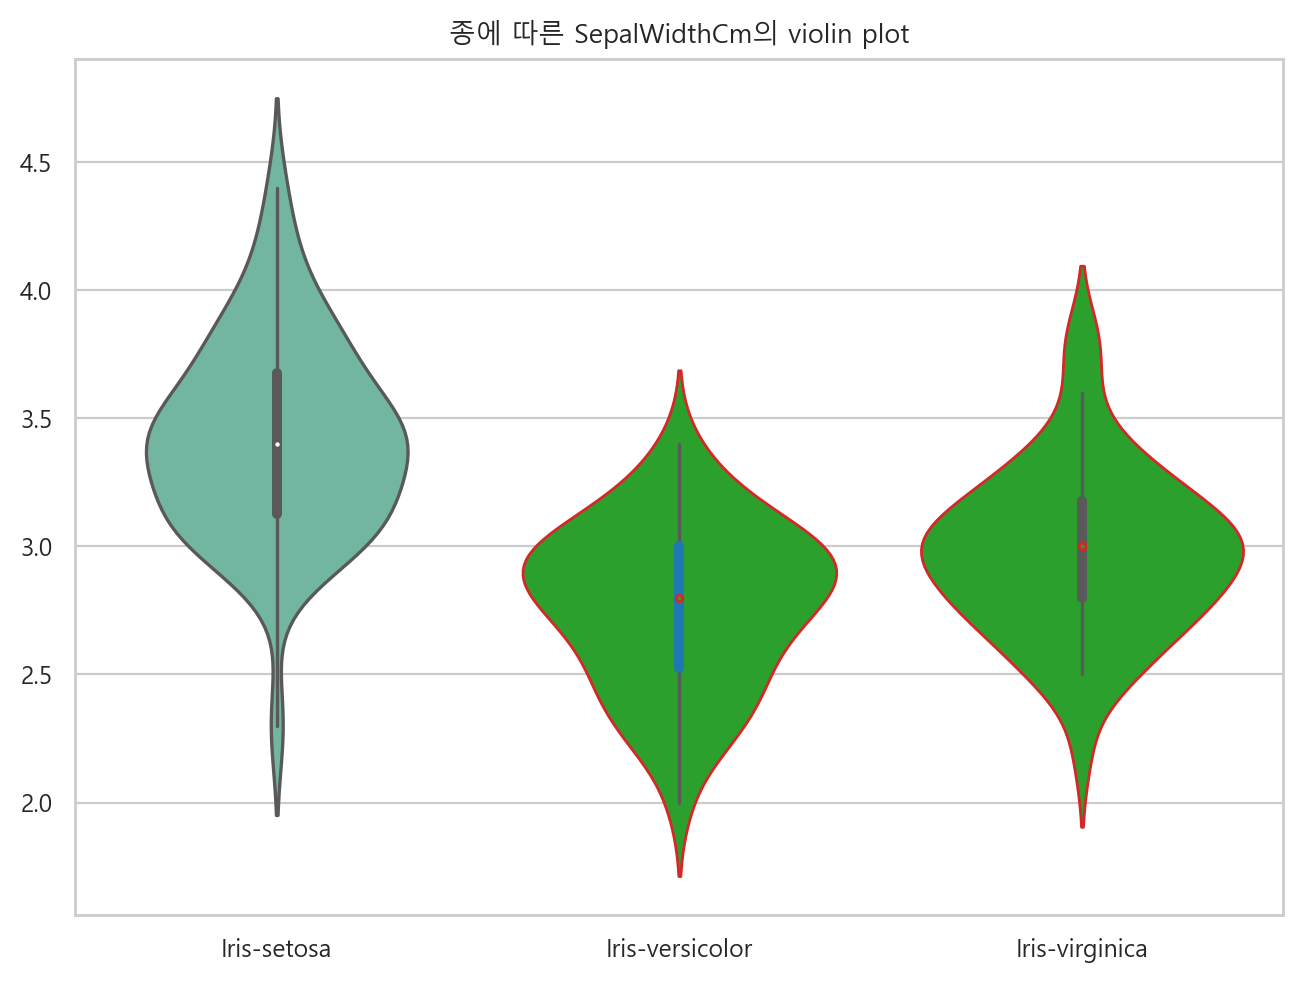

In [9]:
fig, ax = plt.subplots()

sns.violinplot(data = iris,
               x = "Species",
               y = feature_y,
               ax = ax);

ax.set(xlabel = "", 
       ylabel = "",
       title = f"종에 따른 {feature_y}의 violin plot")


color = ["tab:red", "tab:green", "tab:blue", "tab:orange", "black", "gray"]

# collection의 정보 알기
for i, obj in enumerate(ax.collections):
    if i > 1:
        obj.set_ec(color[0])
        obj.set_fc(color[1])
        obj.set_lw(1)
#        obj.set_sizes([30])

for i, line in enumerate(ax.lines):
    if i == 3:
        line.set_color(color[2])
    

# 3. 모범 사례를 재현해 보자

In [10]:
df_peng = sns.load_dataset("penguins")
df_peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

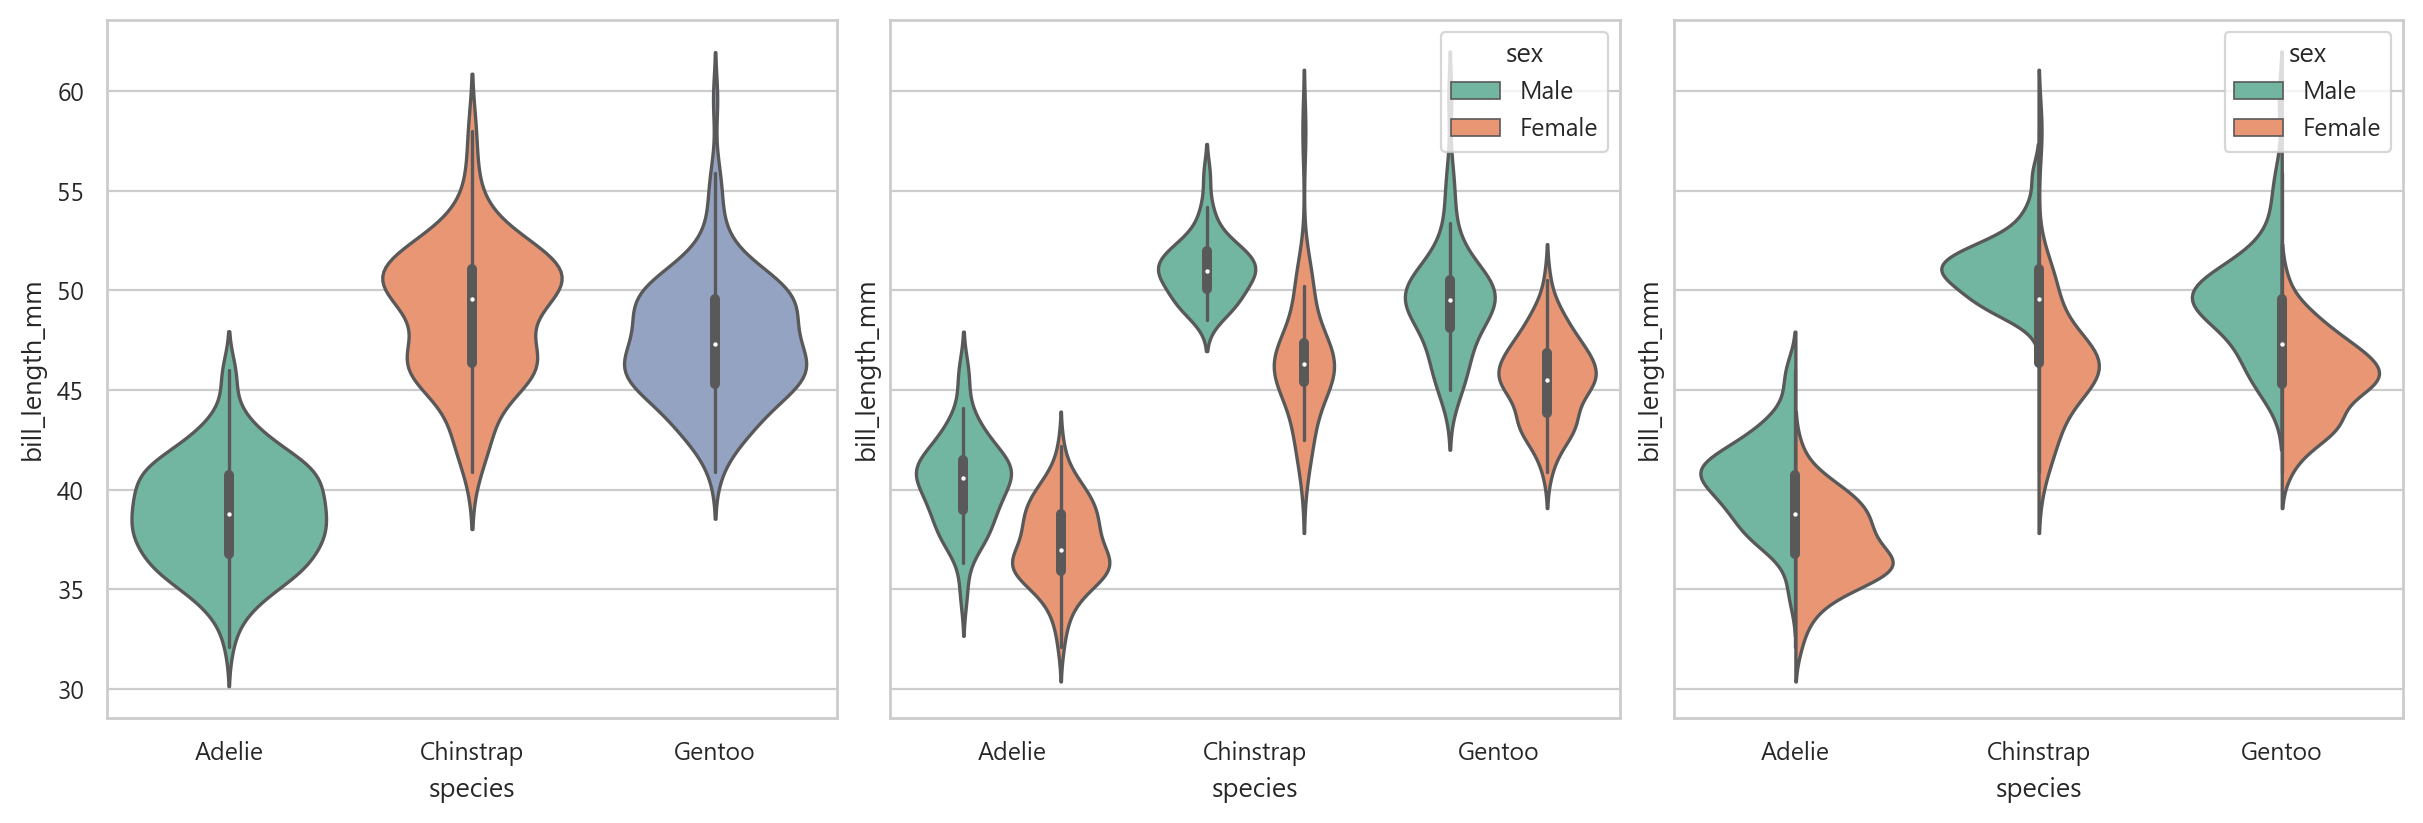

In [11]:
## ax1: violinplot을 펭귄의 종별로 bill_length_mm 그래프를 그리시오.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

feature = "bill_length_mm"
sns.violinplot(data = df_peng,
               x = "species",
               y = feature,
               ax = ax1)

sns.violinplot(data = df_peng,
               x = "species",
               y = feature,
               hue = "sex",
#               split = True,
               ax = ax2)

sns.violinplot(data = df_peng,
               x = "species",
               y = feature,
               hue = "sex",
               split = True,
               ax = ax3)

In [12]:
import matplotlib.colors as mcolors
import colorsys

def set_hls(c, dh=0, dl=0, ds=0, dalpha=0):
    """
    c : (array -like, str) color in RGB space
    dh : (float) change in Hue
        default = 0
    dl : (float) change in Lightness
        default = 0
    ds : (float) change in Saturation
        default = 0
    """
    # 입력된 color를 RGBA numpy array로 변환
    c_rgba = mcolors.to_rgba(c)
    
    # RGB와 alpha 분리
    c_rgb = c_rgba[:3]
    alpha = c_rgba[3]
    
    # RGB 색공간을 HLS 색공간으로 변환 후 입력된 변화 적용
    c_hls = colorsys.rgb_to_hls(*c_rgb)
    h = c_hls[0] + dh
    l = max(min(c_hls[1] + dl, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    s = max(min(c_hls[2] + ds, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    
    # HLS 색공간에서 변경된 색을 RGB 색공간으로 변환
    c_rgb_new = colorsys.hls_to_rgb(h, l, s)
    alpha = max(min(alpha+dalpha, 1), 0)  # 0~1 범위를 넘지 않도록 제어
    
    return np.append(c_rgb_new, alpha) # alpha 추가하여 return

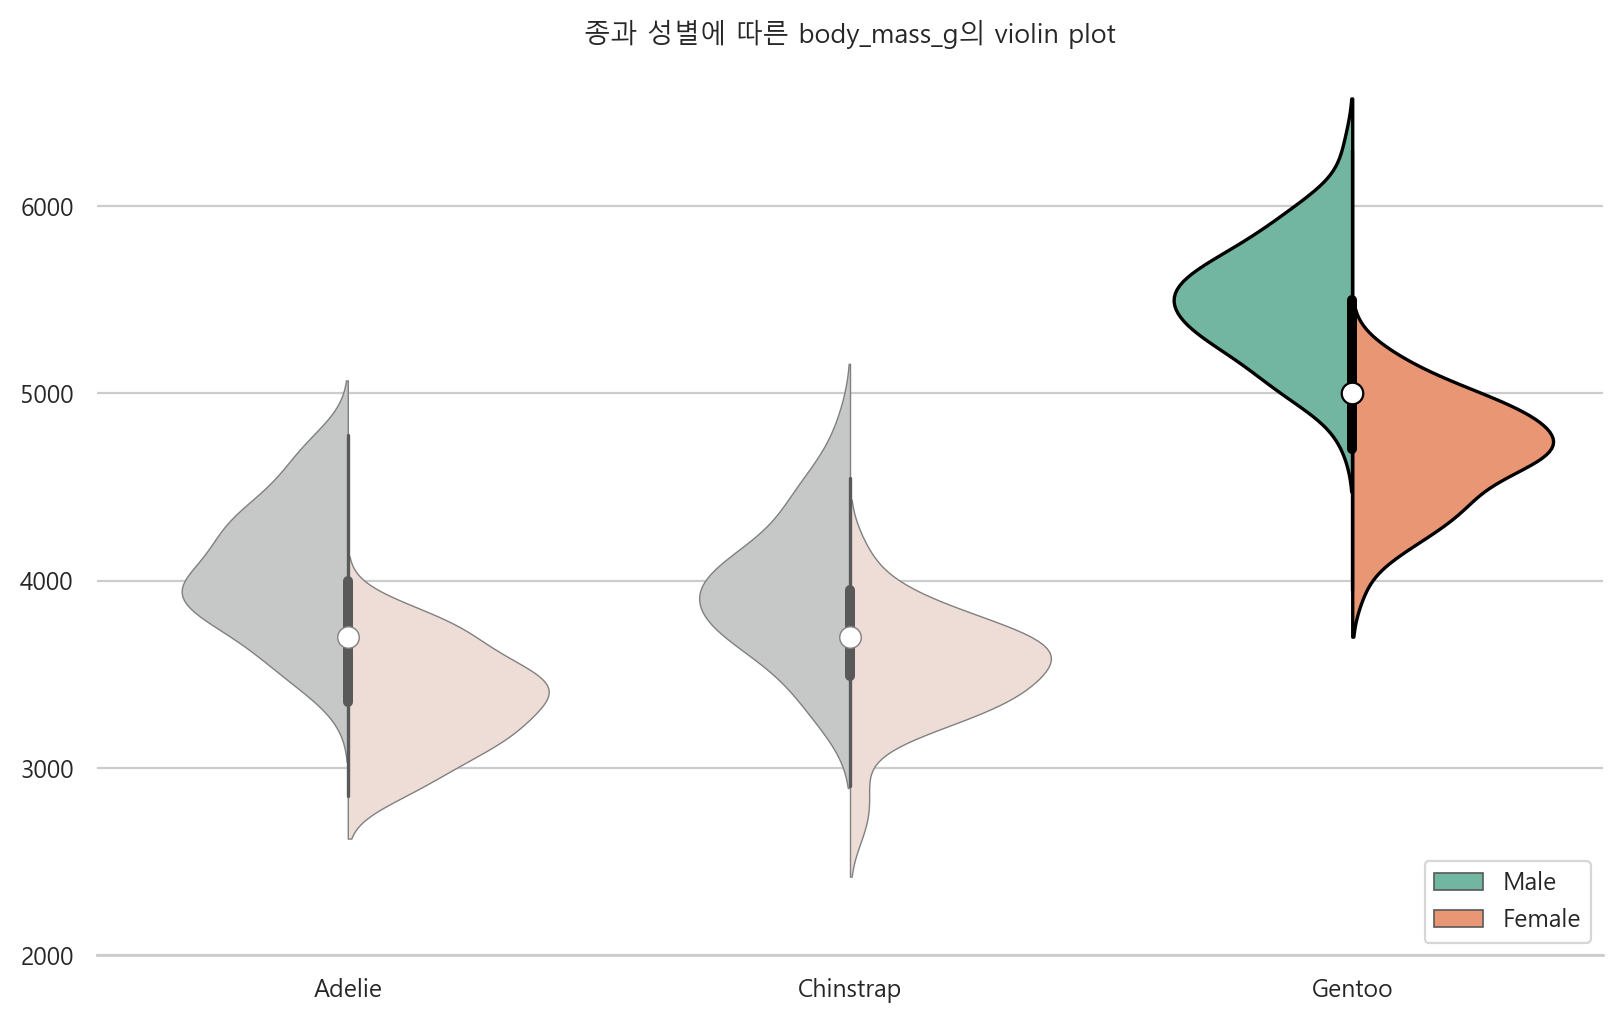

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

feature = "body_mass_g"
sns.violinplot(data = df_peng,
               x = "species",
               y = feature,
               hue = "sex",
               split = True,
               ax = ax)

for i, obj in enumerate(ax.collections):
    if i < 6: 
        obj.set_ec("gray")
        obj.set_lw(0.5)
        obj.set_fc(set_hls(obj.get_fc(), ds = -0.3, dl = 0.2))
    else:
        obj.set_ec("k")
        
    if (i+2)%3  == 0:
        obj.set_sizes([60])
        obj.set_fc("white")

for i, line in enumerate(ax.lines):
    if i > 3:
        line.set_color("k")
        

ax.set(xlabel = "",
       ylabel = "",
       title = f"종과 성별에 따른 {feature}의 violin plot")

ax.set_ylim(ymin = 2000)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.legend(loc = "lower right");

In [14]:
film_title = [
    "명량",
    "극한직업",
    "신과함께-죄와 벌",
    "국제시장",
    "어벤져스: 엔드게임",
    "겨울왕국 2",
    "베테랑",
    "아바타",
]

admissions = [
    17_613_682,
    16_264_944,
    14_410_754,
    14_257_115,
    13_934_592,
    13_747_792,
    13_414_372,
    13_338_863,
]

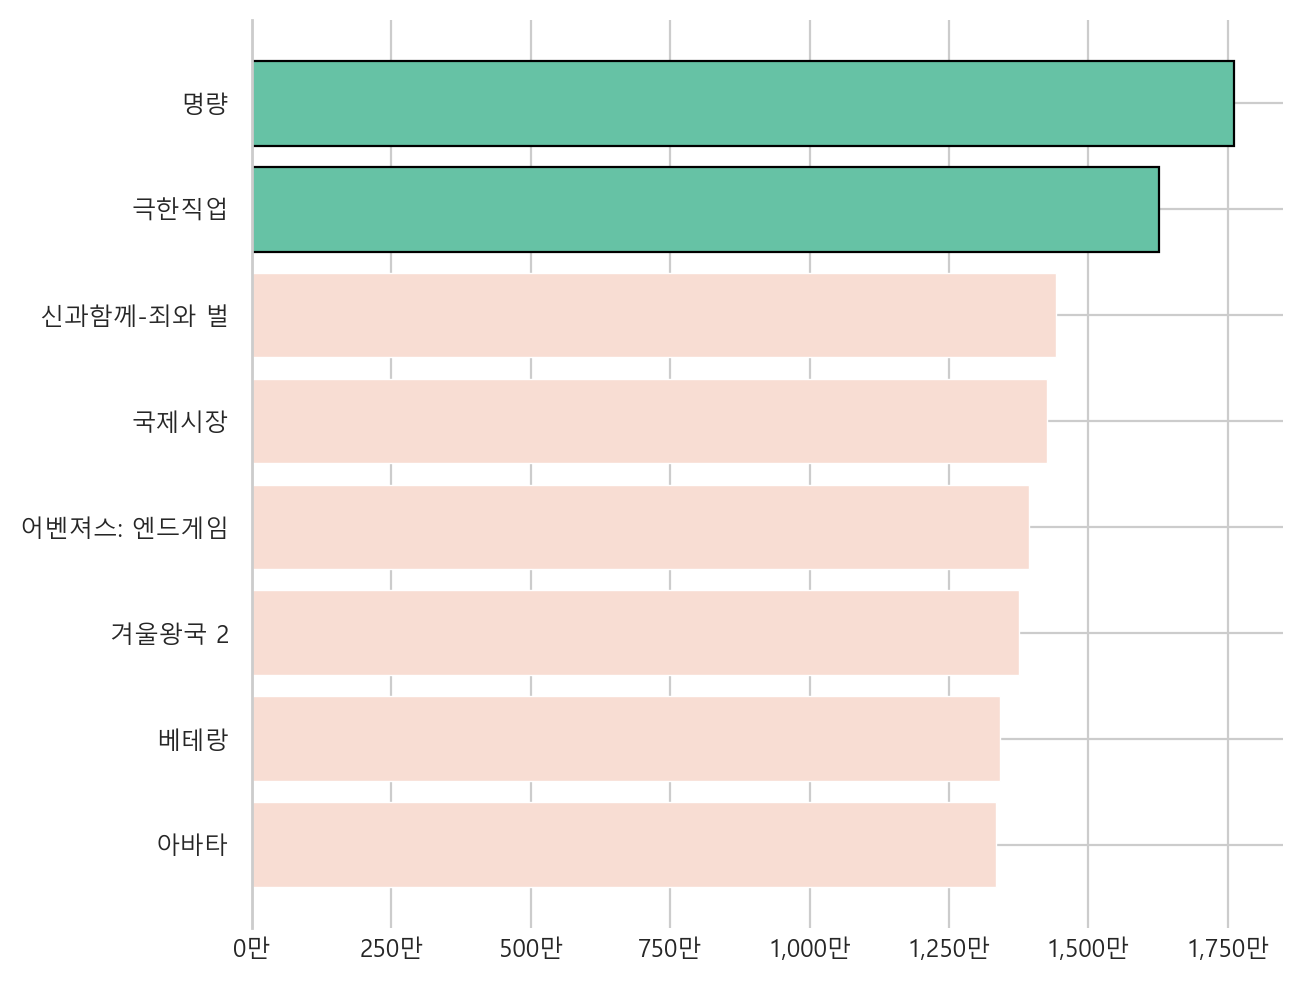

In [15]:
# 류승룡이 나온 영화만 강조해 보자.

from matplotlib.ticker import FuncFormatter
admission_formatter = FuncFormatter(lambda x, pos: f"{x / 10000:,.0f}만")

fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_major_formatter(admission_formatter)
ax.invert_yaxis()
ax.spines[["top", "right", "bottom"]].set_visible(False)

for i, p in enumerate(ax.patches):
    if i > 1: 
        p.set_ec("w")
        p.set_lw(0.5)
#        p.set_fc(set_hls(obj.get_fc(), ds = -0.3, dl = 0.2))
        p.set_fc(sns.set_hls_values(obj.get_fc(), l = 0.9))
    else:
        p.set_ec("k")

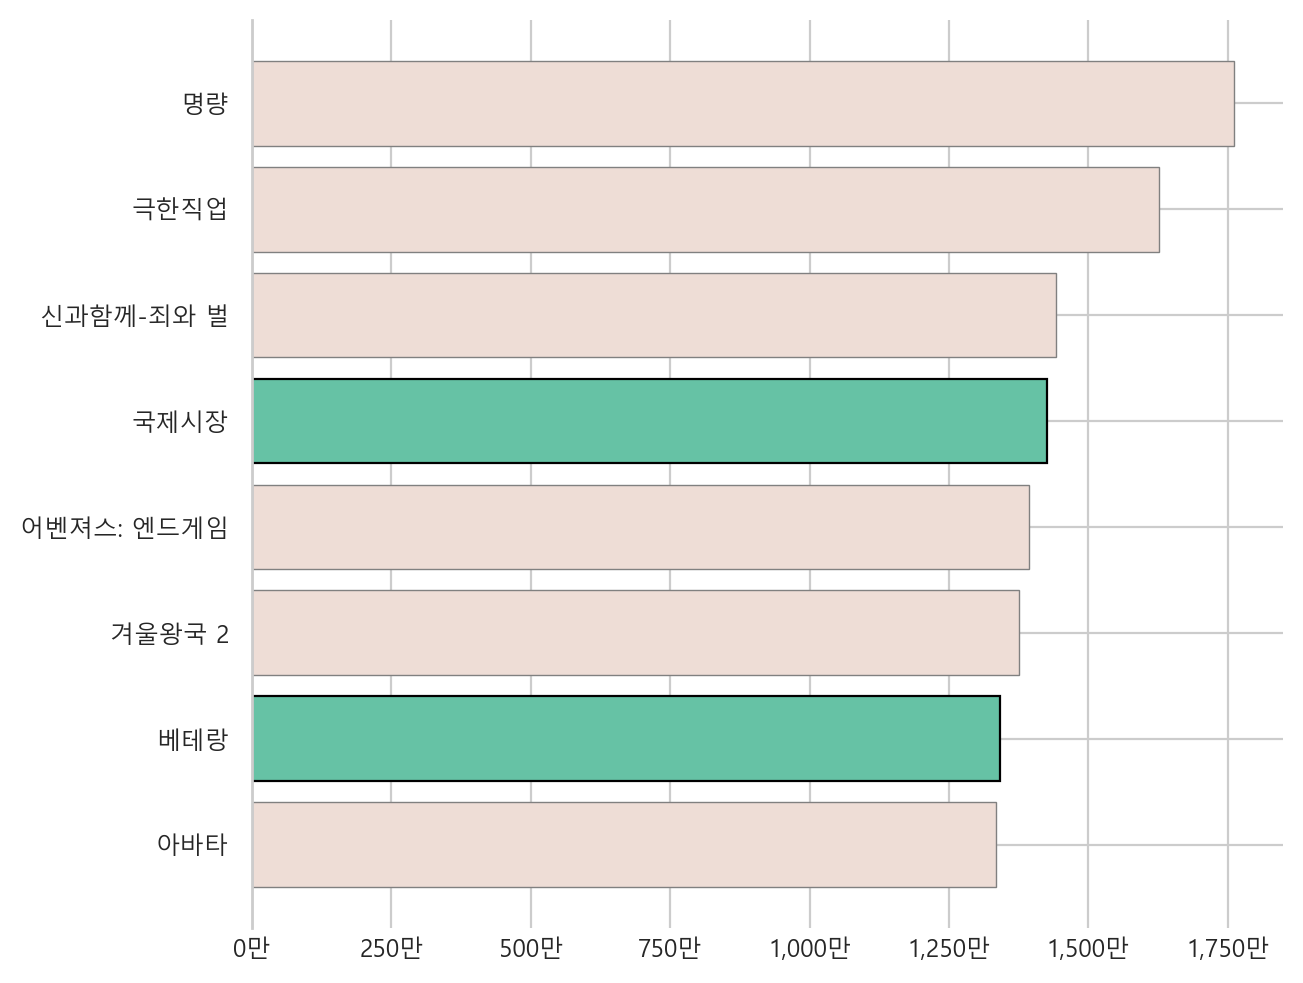

In [16]:
## 황정민이 나온 영화만 강조해 보자.
fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_major_formatter(admission_formatter)
ax.invert_yaxis()
ax.spines[["top", "right", "bottom"]].set_visible(False)

for i, p in enumerate(ax.patches):
    if i not in [3,6]: 
        p.set_ec("gray")
        p.set_fc("gray")
        p.set_lw(0.5)
        p.set_fc(set_hls(obj.get_fc(), ds = -0.3, dl = 0.2))
#        p.set_fc(sns.set_hls_values(obj.get_fc(), l = 0.9))
    else:
        p.set_ec("k")